In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\moras\Downloads\intern 2 grow\sales_data.csv")


In [3]:
data.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
date        369 non-null object
product     369 non-null object
category    369 non-null object
price       367 non-null float64
quantity    368 non-null float64
revenue     368 non-null float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [43]:
data["date"]=pd.to_datetime(data["date"])

In [5]:
data[data.quantity .isnull()]

,date,product,category,price,quantity,revenue
122,2022-05-01,Smartphone,Electronics,600.0,NaN,6600.0


In [6]:
data["quantity"]= data["quantity"].replace(np.nan,data['revenue']/data['price'])

In [7]:
data[data.revenue .isnull()]

,date,product,category,price,quantity,revenue
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,NaN


In [8]:
data["revenue"]= data["revenue"].replace(np.nan,data['price']*data['quantity'])

In [9]:
data[data.price.isnull()]

,date,product,category,price,quantity,revenue
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


In [10]:
data["price"]= data["price"].replace(np.nan,data['revenue']/data['quantity'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
date        369 non-null object
product     369 non-null object
category    369 non-null object
price       369 non-null float64
quantity    369 non-null float64
revenue     369 non-null float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


1. What was the total revenue generated by the company over the course of the year?


In [12]:
data["revenue"].sum()

760330.0

2. Which product had the highest revenue? How much revenue did it generate?


In [13]:
df=[data.groupby(["product"])["revenue"].sum()]
df

[product
 Backpack       20400.0
 Coat           33800.0
 Headphones     18000.0
 Hoodie         21000.0
 Jeans          20650.0
 Laptop          6000.0
 Smartphone    434400.0
 Smartwatch     60800.0
 Sneakers       21600.0
 Speaker        39680.0
 T-Shirt        20100.0
 Tablet         18000.0
 Wallet         13200.0
 Watch          32700.0
 Name: revenue, dtype: float64]

([<matplotlib.axis.YTick at 0x1c61347d708>,
 <a list of 5 Text yticklabel objects>)

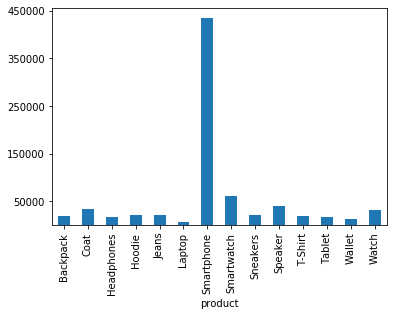

In [14]:
data.groupby(["product"])["revenue"].sum().plot(kind='bar')
plt.yticks(np.arange(50000, 500000, 100000)) 


3. What was the average price of a product sold by the company?

In [17]:
data ["price"].mean()

210.5691056910569

4. What was the total quantity of products sold by the company?

In [18]:
data ["quantity"].sum()

5371.0

5. Which category had the highest revenue? How much revenue did it generate?

In [23]:
data["category"].value_counts()

Electronics    130
Clothing       120
Accessories     70
Bags            23
Shoes           23
Bgas             1
Shoeses          1
Clohting         1
Name: category, dtype: int64

In [33]:
data['category'].replace('Shoeses','Shoes',inplace=True)
data["category"].replace('Clohting','Clothing',inplace=True)
data["category"].replace('Bgas','Bags',inplace=True)


In [34]:
data["category"].value_counts()

Electronics    130
Clothing       121
Accessories     70
Bags            24
Shoes           24
Name: category, dtype: int64

In [36]:
data.groupby(["category"]).sum()

,price,quantity,revenue
category,,,
Accessories,10860.0,962.0,106700.0
Bags,1200.0,408.0,20400.0
Clothing,6420.0,2281.0,95550.0
Electronics,57300.0,1450.0,516080.0
Shoes,1920.0,270.0,21600.0


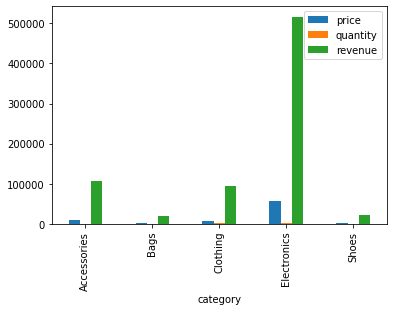

In [37]:
data.groupby(["category"]).sum().plot(kind='bar')


6. What was the average revenue per sale?


In [40]:

data.describe()

,price,quantity,revenue
count,369.000000,369.000000,369.000000
mean,210.569106,14.555556,2060.514905
std,226.934800,8.586059,1908.335265
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,200.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


In [41]:
data["revenue"].mean()

2060.5149051490516

In [47]:
data["q"]=data["date"].dt.quarter


In [50]:
data.groupby(["q"]).sum()

,price,quantity,revenue,month
q,,,,
1,19910.0,1322.0,182100.0,182
2,18770.0,1318.0,185970.0,455
3,19570.0,1335.0,197680.0,735
4,19450.0,1396.0,194580.0,1033


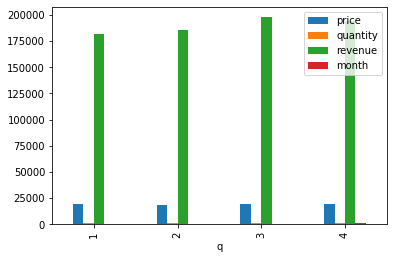

In [51]:
data.groupby(["q"]).sum().plot(kind='bar')